# K-means clustering on digits
This tutorial is derived from Jake VanderPlas' Python Data Science Handbook
useful links:
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://github.com/Drake-Firestorm/Python-Data-Science-Handbook?tab=MIT-1-ov-file

https://github.com/DZ521111/054-DhruvKakadiya

In [1]:
#loading datasets with scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()


In [3]:
#defining kmeans, number of clusters = 10 for digits
#finding fit
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

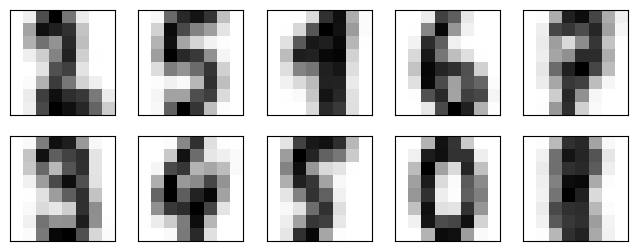

In [4]:
# plotting individual digits as clusters
#
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
#checking accuracy
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

<Axes: >

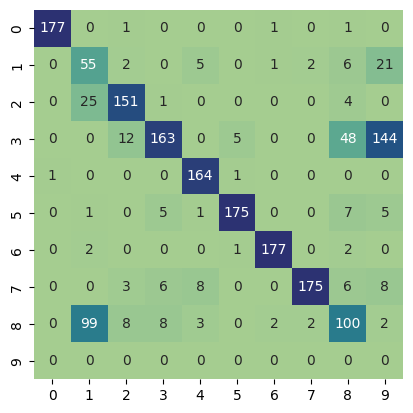

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap = 'crest', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)